In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle



In [9]:
X = np.loadtxt('created_dataset.txt', delimiter=',')


ValueError: X has 2 features, but KMeans is expecting 3 features as input.

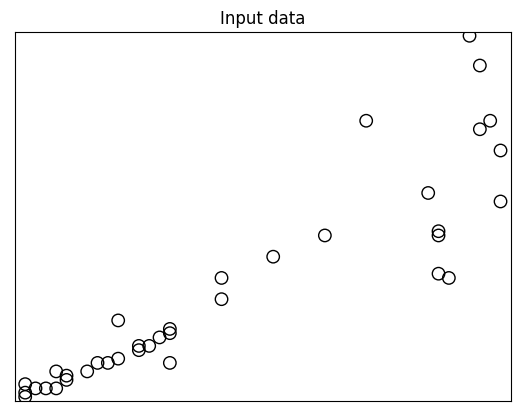

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
X = np.loadtxt('created_dataset.txt', delimiter=',')


num_clusters = 3

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid 
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),cmap=plt.cm.Paired, aspect='auto', origin='lower')

# Overlay input points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
        edgecolors='black', s=80)

# Plot the centers of clusters
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


Number of clusters = 2
Silhouette score = 0.6776819329704211

Number of clusters = 3
Silhouette score = 0.6417461360010607

Number of clusters = 4
Silhouette score = 0.5332727456934907

Number of clusters = 5
Silhouette score = 0.5310881874251718

Number of clusters = 6
Silhouette score = 0.5335032106425484

Number of clusters = 7
Silhouette score = 0.5222836861797799

Number of clusters = 8
Silhouette score = 0.5582013970800499

Number of clusters = 9
Silhouette score = 0.5476469123281585

Optimal number of clusters = 2


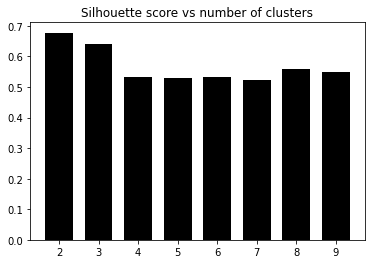

In [ ]:
# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)

# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn import datasets
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

Accuracy on training data = 97.5
Accuracy on testing data = 96.66666666666667


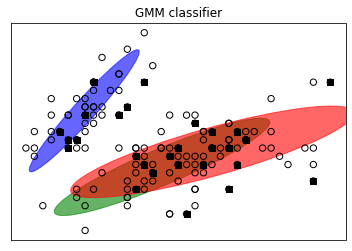

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

X, y = datasets.load_iris(return_X_y=True)

# Split dataset into training and testing (80/20 split)
skf = StratifiedKFold(n_splits=5) 
skf.get_n_splits(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract the number of classes
num_classes = len(np.unique(y_train))

# Build GMM
classifier = GaussianMixture(n_components=num_classes, covariance_type='full', init_params='kmeans', max_iter=30)

# Initialize the GMM means 
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0) for i in range(num_classes)])
    
# Train the GMM classifier 
classifier.fit(X_train)

# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier.covariances_[i][:2, :2])

    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2], 
            eigenvalues[0], eigenvalues[1], 180 + angle, 
            color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

# Plot the data 
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, label=iris.target_names[i])
    
    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40 ,label=iris.target_names[i])
    
# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)
             
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)
    
plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())
    
plt.show()